In [1]:
from fastai.vision.all import *
matplotlib.rc('image', cmap='Greys')

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/storage/data/mnist_sample/train'),Path('/storage/data/mnist_sample/labels.csv'),Path('/storage/data/mnist_sample/valid')]

In [5]:
Path.BASE_PATH = path

In [6]:
path.ls()

(#3) [Path('train'),Path('labels.csv'),Path('valid')]

In [20]:
stacked_threes = torch.stack([tensor(Image.open(o)) for o in (path/'train'/'3').ls().sorted()])
stacked_threes = stacked_threes.float()/255
stacked_sevens = torch.stack([tensor(Image.open(o)) for o in (path/'train'/'7').ls().sorted()])
stacked_sevens = stacked_sevens.float()/255
stacked_threes.shape,stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

<AxesSubplot:>

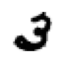

In [21]:
a_3 = stacked_threes[4269]
show_image(a_3)

(<AxesSubplot:>, <AxesSubplot:>)

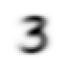

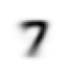

In [22]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)
show_image(mean3), show_image(mean7)


In [24]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls().sorted()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls().sorted()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [30]:
def mnist_dist(a,b): return (a-b).abs().mean((-1,-2))

In [31]:
mnist_dist(a_3, mean3)

tensor(0.1784)

In [33]:
valid_3_dist = mnist_dist(valid_3_tens, mean3)
valid_3_dist

tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260])

In [34]:
def is_3(x): return mnist_dist(x,mean3) < mnist_dist(x,mean7)

In [36]:
is_3(valid_3_tens)

tensor([ True,  True,  True,  ..., False,  True,  True])

In [45]:
accuracy_3 = is_3(valid_3_tens).float().mean()
accuracy_7 = (1-is_3(valid_7_tens).float()).mean()
accuracy_3, accuracy_7

(tensor(0.9168), tensor(0.9854))

# Turning Your Notebook into a Real App

In [1]:
!pip install viola
!jupyter serverextension enable --sys-prefix viola

Enabling: viola
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      X is viola importable?
